【参考ppt】[https://wenku.baidu.com/view/67bea5cf58fafab068dc0244.html](https://wenku.baidu.com/view/67bea5cf58fafab068dc0244.html)

需要文件

* ACME_orgchart.net
* ACME_advice.net
* russians.net

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms as nxa
from itertools import permutations, combinations
from scipy.special import perm
from operator import itemgetter
import pandas as pd

# chapter 1

D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


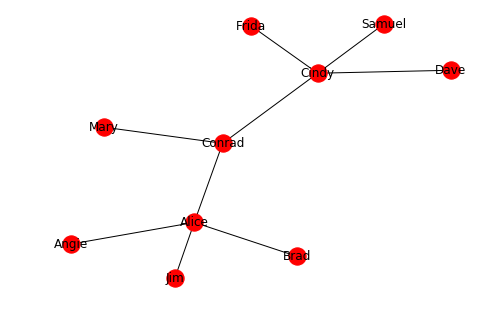

In [2]:
orgchart = nx.read_pajek("ACME_orgchart.net")
nx.draw(orgchart, with_labels=True)

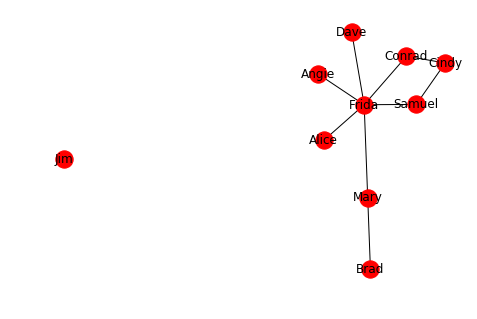

In [3]:
advice = nx.read_pajek("ACME_advice.net")
nx.draw(advice, with_labels=True)

# chapter 2
<font color=orange>**风筝图**</font>

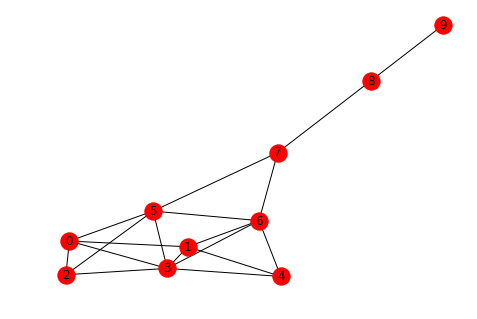

In [4]:
g = nx.generators.small.krackhardt_kite_graph()
nx.draw(g, with_labels=True)

##### 点、边

In [5]:
g.number_of_edges()

18

In [6]:
g.number_of_nodes()

10

##### 邻接边

In [7]:
g.adjacency()

In [8]:
for k, v in g.adjacency():
    print(k, v, sep=',')

0,{1: {}, 2: {}, 3: {}, 5: {}}
1,{0: {}, 3: {}, 4: {}, 6: {}}
2,{0: {}, 3: {}, 5: {}}
3,{0: {}, 1: {}, 2: {}, 4: {}, 5: {}, 6: {}}
4,{1: {}, 3: {}, 6: {}}
5,{0: {}, 2: {}, 3: {}, 6: {}, 7: {}}
6,{1: {}, 3: {}, 4: {}, 5: {}, 7: {}}
7,{5: {}, 6: {}, 8: {}}
8,{7: {}, 9: {}}
9,{8: {}}


In [9]:
{k: list(v.keys()) for k, v in g.adjacency()}

{0: [1, 2, 3, 5],
 1: [0, 3, 4, 6],
 2: [0, 3, 5],
 3: [0, 1, 2, 4, 5, 6],
 4: [1, 3, 6],
 5: [0, 2, 3, 6, 7],
 6: [1, 3, 4, 5, 7],
 7: [5, 6, 8],
 8: [7, 9],
 9: [8]}

##### 遍历算法

* 深度优先

In [10]:
dfs_edges = nxa.traversal.dfs_edges(g, source=0)     # 深度优先搜索：边的迭代器
list(dfs_edges)     

[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]

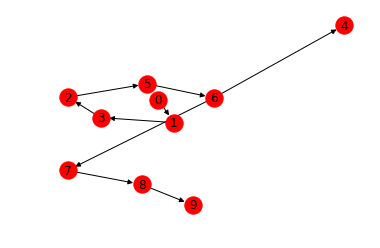

In [11]:
# DFS 遍历图
dfs_tree = nxa.traversal.dfs_tree(g, source=0)
plt.axis('off')
nx.draw_networkx(dfs_tree)

In [12]:
dict(nxa.traversal.dfs_successors(g, source=0))

{0: [1], 1: [3], 3: [2], 2: [5], 5: [6], 6: [4, 7], 7: [8], 8: [9]}

In [13]:
dict(nxa.traversal.dfs_predecessors(g, source=0))

{1: 0, 3: 1, 2: 3, 5: 2, 6: 5, 4: 6, 7: 6, 8: 7, 9: 8}

* 广度优先

In [14]:
bfs_edges = nxa.traversal.bfs_edges(g, source=0)     # 广度优先搜索：边的迭代器
list(bfs_edges)

[(0, 1), (0, 2), (0, 3), (0, 5), (1, 4), (1, 6), (5, 7), (7, 8), (8, 9)]

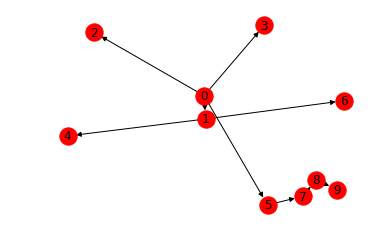

In [15]:
# BFS 遍历图
bfs_tree = nxa.traversal.bfs_tree(g, source=0)
plt.axis('off')
nx.draw_networkx(bfs_tree)

In [16]:
dict(nxa.traversal.bfs_successors(g, source=0))

{0: [1, 2, 3, 5], 1: [4, 6], 5: [7], 7: [8], 8: [9]}

In [17]:
dict(nxa.traversal.bfs_predecessors(g, source=0))

{1: 0, 2: 0, 3: 0, 5: 0, 4: 1, 6: 1, 7: 5, 8: 7, 9: 8}

##### 最短路径

In [18]:
nxa.shortest_path(g, 0, 7)

[0, 5, 7]

In [19]:
nxa.shortest_path_length(g, 0, 7)

2

In [20]:
nxa.average_shortest_path_length(g)

1.9777777777777779

In [21]:
# 这里用排列，对于无向图来说组合也一样
n_paths = perm(len(g.nodes()), 2)
total_length = sum(nxa.shortest_path_length(g, i, j) for i, j in permutations(g.nodes(), 2))
avg_shortest_length = total_length / n_paths
avg_shortest_length

1.9777777777777779

In [22]:
"""
{
source : {target: [shortest path]}
    }
"""
dict(nxa.all_pairs_shortest_path(g))

{0: {0: [0],
  1: [0, 1],
  2: [0, 2],
  3: [0, 3],
  5: [0, 5],
  4: [0, 1, 4],
  6: [0, 1, 6],
  7: [0, 5, 7],
  8: [0, 5, 7, 8],
  9: [0, 5, 7, 8, 9]},
 1: {1: [1],
  0: [1, 0],
  3: [1, 3],
  4: [1, 4],
  6: [1, 6],
  2: [1, 0, 2],
  5: [1, 0, 5],
  7: [1, 6, 7],
  8: [1, 6, 7, 8],
  9: [1, 6, 7, 8, 9]},
 2: {2: [2],
  0: [2, 0],
  3: [2, 3],
  5: [2, 5],
  1: [2, 0, 1],
  4: [2, 3, 4],
  6: [2, 3, 6],
  7: [2, 5, 7],
  8: [2, 5, 7, 8],
  9: [2, 5, 7, 8, 9]},
 3: {3: [3],
  0: [3, 0],
  1: [3, 1],
  2: [3, 2],
  4: [3, 4],
  5: [3, 5],
  6: [3, 6],
  7: [3, 5, 7],
  8: [3, 5, 7, 8],
  9: [3, 5, 7, 8, 9]},
 4: {4: [4],
  1: [4, 1],
  3: [4, 3],
  6: [4, 6],
  0: [4, 1, 0],
  2: [4, 3, 2],
  5: [4, 3, 5],
  7: [4, 6, 7],
  8: [4, 6, 7, 8],
  9: [4, 6, 7, 8, 9]},
 5: {5: [5],
  0: [5, 0],
  2: [5, 2],
  3: [5, 3],
  6: [5, 6],
  7: [5, 7],
  1: [5, 0, 1],
  4: [5, 3, 4],
  8: [5, 7, 8],
  9: [5, 7, 8, 9]},
 6: {6: [6],
  1: [6, 1],
  3: [6, 3],
  4: [6, 4],
  5: [6, 5],
  7: [6, 7],
 

In [23]:
nxa.dijkstra_path(g, 0 ,7)

[0, 5, 7]

In [24]:
# 比较最短路径算法与Dijkstra算法（无权重，无向图）
# 在g的前8个节点两两看 "最短路径"
sub_nodes = list(g.nodes())[:8]
fmt = "{:<2}\t{:<2}\t{:<10}\t{:<10}"
print(fmt.format('from', 'to', 'shortest_path', 'dijkstra_path'))
for pair in combinations(sub_nodes, 2):
    print(fmt.format(*pair, str(nxa.shortest_path(g, *pair)), str(nxa.dijkstra_path(g, *pair))))

from	to	shortest_path	dijkstra_path
0 	1 	[0, 1]    	[0, 1]    
0 	2 	[0, 2]    	[0, 2]    
0 	3 	[0, 3]    	[0, 3]    
0 	4 	[0, 1, 4] 	[0, 1, 4] 
0 	5 	[0, 5]    	[0, 5]    
0 	6 	[0, 1, 6] 	[0, 1, 6] 
0 	7 	[0, 5, 7] 	[0, 5, 7] 
1 	2 	[1, 0, 2] 	[1, 0, 2] 
1 	3 	[1, 3]    	[1, 3]    
1 	4 	[1, 4]    	[1, 4]    
1 	5 	[1, 0, 5] 	[1, 0, 5] 
1 	6 	[1, 6]    	[1, 6]    
1 	7 	[1, 6, 7] 	[1, 6, 7] 
2 	3 	[2, 3]    	[2, 3]    
2 	4 	[2, 3, 4] 	[2, 3, 4] 
2 	5 	[2, 5]    	[2, 5]    
2 	6 	[2, 3, 6] 	[2, 3, 6] 
2 	7 	[2, 5, 7] 	[2, 5, 7] 
3 	4 	[3, 4]    	[3, 4]    
3 	5 	[3, 5]    	[3, 5]    
3 	6 	[3, 6]    	[3, 6]    
3 	7 	[3, 5, 7] 	[3, 5, 7] 
4 	5 	[4, 3, 5] 	[4, 3, 5] 
4 	6 	[4, 6]    	[4, 6]    
4 	7 	[4, 6, 7] 	[4, 6, 7] 
5 	6 	[5, 6]    	[5, 6]    
5 	7 	[5, 7]    	[5, 7]    
6 	7 	[6, 7]    	[6, 7]    


In [25]:
# 有权图两种算法比较
weights = [1, 9, 3, 5, 5, 8, 7, 6, 4, 3, 0, 0, 2, 1, 6, 3, 4, 9]    # 与书中随机数相同设置
new_edges = [(from_, to, weight) for (from_, to), weight in zip(g.edges(), weights)]
new_edges

[(0, 1, 1),
 (0, 2, 9),
 (0, 3, 3),
 (0, 5, 5),
 (1, 3, 5),
 (1, 4, 8),
 (1, 6, 7),
 (2, 3, 6),
 (2, 5, 4),
 (3, 4, 3),
 (3, 5, 0),
 (3, 6, 0),
 (4, 6, 2),
 (5, 6, 1),
 (5, 7, 6),
 (6, 7, 3),
 (7, 8, 4),
 (8, 9, 9)]

In [26]:
weight_g = nx.Graph()
weight_g.add_weighted_edges_from(new_edges)

print(fmt.format('from', 'to', 'shortest_path', 'dijkstra_path'))
for pair in combinations(sub_nodes, 2):
    print(fmt.format(*pair, str(nxa.shortest_path(weight_g, *pair)), str(nxa.dijkstra_path(weight_g, *pair))))

from	to	shortest_path	dijkstra_path
0 	1 	[0, 1]    	[0, 1]    
0 	2 	[0, 2]    	[0, 3, 5, 2]
0 	3 	[0, 3]    	[0, 3]    
0 	4 	[0, 1, 4] 	[0, 3, 6, 4]
0 	5 	[0, 5]    	[0, 3, 5] 
0 	6 	[0, 1, 6] 	[0, 3, 6] 
0 	7 	[0, 5, 7] 	[0, 3, 6, 7]
1 	2 	[1, 0, 2] 	[1, 0, 3, 5, 2]
1 	3 	[1, 3]    	[1, 0, 3] 
1 	4 	[1, 4]    	[1, 0, 3, 6, 4]
1 	5 	[1, 0, 5] 	[1, 0, 3, 5]
1 	6 	[1, 6]    	[1, 0, 3, 6]
1 	7 	[1, 6, 7] 	[1, 0, 3, 6, 7]
2 	3 	[2, 3]    	[2, 5, 3] 
2 	4 	[2, 3, 4] 	[2, 5, 3, 6, 4]
2 	5 	[2, 5]    	[2, 5]    
2 	6 	[2, 3, 6] 	[2, 5, 3, 6]
2 	7 	[2, 5, 7] 	[2, 5, 3, 6, 7]
3 	4 	[3, 4]    	[3, 6, 4] 
3 	5 	[3, 5]    	[3, 5]    
3 	6 	[3, 6]    	[3, 6]    
3 	7 	[3, 5, 7] 	[3, 6, 7] 
4 	5 	[4, 3, 5] 	[4, 6, 3, 5]
4 	6 	[4, 6]    	[4, 6]    
4 	7 	[4, 6, 7] 	[4, 6, 7] 
5 	6 	[5, 6]    	[5, 3, 6] 
5 	7 	[5, 7]    	[5, 3, 6, 7]
6 	7 	[6, 7]    	[6, 7]    


# chapter 3
<font color=orange>**俄罗斯人社会网络**</fomnt>

In [27]:
g = nx.read_pajek("russians.net")
len(g)

87250

* 程度中心值（degree centrality);名人

In [28]:
deg = nx.degree(g)   # 各节点的度数
type(deg)

networkx.classes.reportviews.MultiDegreeView

In [29]:
deg['valerois']

232

In [30]:
deg_values = [v for k, v in deg]
min(deg_values), max(deg_values)

(1, 4691)

In [31]:
sorted_deg = sorted(deg, key=itemgetter(1), reverse=True)
sorted_deg[:9]

[('borisakunin', 4691),
 ('doctor_liza', 3046),
 ('tareeva', 2970),
 ('cheger', 2887),
 ('karial', 2717),
 ('snorapp', 2707),
 ('masha_koroleva', 2683),
 ('elladkin', 2616),
 ('samoleg', 2597)]

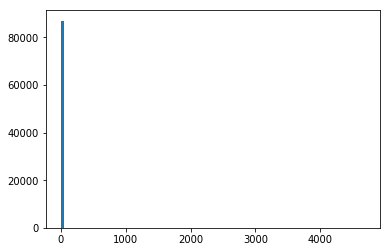

In [32]:
h = plt.hist(deg_values, bins=100)

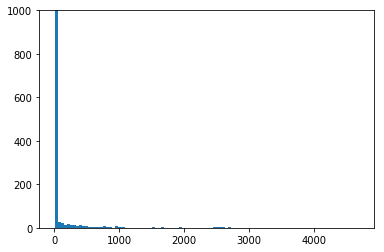

In [33]:
# 大多数的节点度数为1， 掩盖了其他点；在频数<1000的范围可视化
plt.ylim(0, 1000)
plt.hist(deg_values, bins=100);

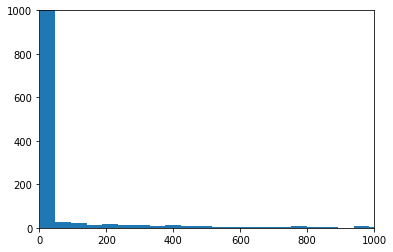

In [34]:
# 在x:0-1000, y:0-1000内可视化
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.hist(deg_values, bins=100);

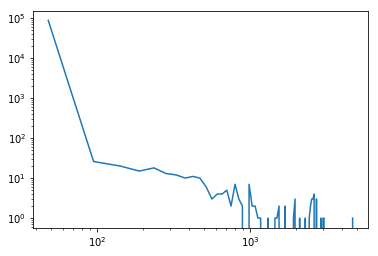

In [35]:
# 对数坐标轴
plt.loglog(h[1][1:], h[0]);

In [36]:
# 删去g中度数<=指定度数的节点
def trim_degrees(g, degree_given=1):
    deg = nx.degree(g)
    core = g.copy()
    for n in g.nodes():
        if deg[n] <= degree_given:
            core.remove_node(n)
    return core

In [37]:
# 删去g中度数<=1的节点
core = trim_degrees(g)
len(core)

25905

In [38]:
core10 = nx.DiGraph(trim_degrees(g, 10))
len(core10)

619

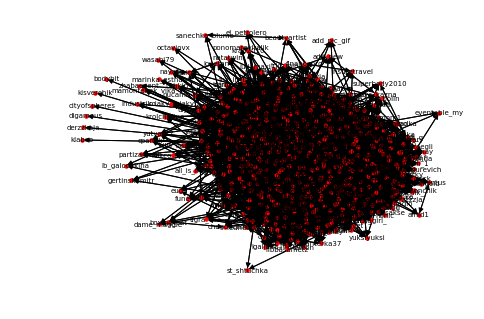

In [39]:
nx.draw(core10, with_labels=True, node_size=12, font_size=7)

* 亲近中心性（closeness centrality); 联系网络的八卦者

In [40]:
cc = nx.closeness_centrality(core10)   # cc是字典
ccs = sorted(cc.items(), key=itemgetter(1), reverse=True)
ccs[:10]

[('azbukivedi', 0.6155378486055777),
 ('valerois', 0.6137040714995035),
 ('bagira', 0.5896946564885496),
 ('karial', 0.5738161559888579),
 ('kpoxa_e', 0.5722222222222222),
 ('yelya', 0.5369244135534318),
 ('kirulya', 0.5364583333333334),
 ('angerona', 0.535064935064935),
 ('borisakunin', 0.53184165232358),
 ('snorapp', 0.5300171526586621)]

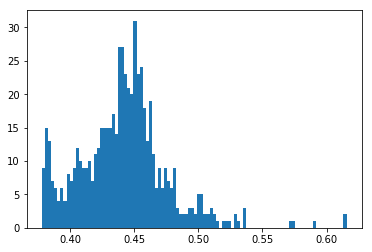

In [41]:
plt.hist(cc.values(), bins=100);

* 居间中心性（Betweenness centrality）；权利、跨界者、桥梁

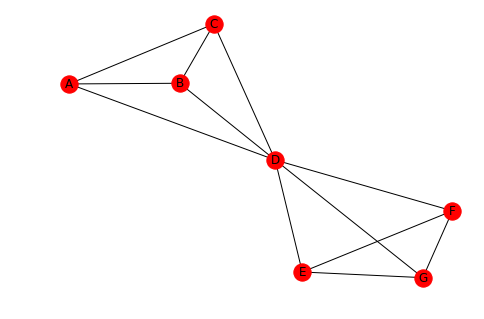

In [42]:
# Example 1
edges = []
for edge in combinations('ABCD', 2):
    edges.append(edge)
for edge in combinations('DEFG', 2):
    edges.append(edge)

bow = nx.Graph()
bow.add_edges_from(edges)
nx.draw(bow, with_labels=True)

In [43]:
nx.betweenness_centrality(bow)

{'A': 0.0, 'B': 0.0, 'C': 0.0, 'D': 0.6, 'E': 0.0, 'F': 0.0, 'G': 0.0}

In [44]:
# Example 2
bc = nx.betweenness_centrality(core10)
bcs = sorted(bc.items(), key=itemgetter(1), reverse=True)
bcs[:10]

[('valerois', 0.21148671833684918),
 ('azbukivedi', 0.09068546983753605),
 ('bagira', 0.06415743377135999),
 ('karial', 0.049436498735116984),
 ('kpoxa_e', 0.040441270584172254),
 ('snorapp', 0.02624442003749055),
 ('borisakunin', 0.023042685592280548),
 ('kirulya', 0.022601460496828554),
 ('eprst2000', 0.021420612080769154),
 ('doctor_liza', 0.020507259543668846)]

* core10 三种中心度汇总

In [45]:
dc = nx.degree(core10)
dcs = sorted(dc, key=itemgetter(1), reverse=True)   # 重新对core10计算程度中心度，书中不一致！！！
names = set(next(zip(*dcs[:10]))) | set(next(zip(*ccs[:10]))) | set(next(zip(*bcs[:10])))
c_data = [[dc[name], cc[name], bc[name]] for name in names]
c_df = pd.DataFrame(c_data, index=names, columns=['程度中心性', '亲近中心性', '居间中心性'])
c_df

,程度中心性,亲近中心性,居间中心性
yelya,218,0.536924,0.015239
karial,336,0.573816,0.049436
azbukivedi,466,0.615538,0.090685
kpoxa_e,320,0.572222,0.040441
doctor_liza,218,0.481684,0.020507
eprst2000,222,0.528657,0.021421
snorapp,254,0.530017,0.026244
angerona,242,0.535065,0.019238
bagira,408,0.589695,0.064157
borisakunin,228,0.531842,0.023043


* 特征向量中心性（eigenvector centrality），幕后大佬

In [46]:
nx.eigenvector_centrality(core10)

{'fif': 0.0264990503046959,
 'i_crust': 0.0313601927156125,
 'igor_mkrt': 0.02186516539091304,
 'immoralist': 0.04338650175746335,
 'reydan': 0.015852297632029215,
 'shiros': 0.016391011201331917,
 'ortivika': 0.018282090119432107,
 'margo_qu': 0.02809148067689435,
 'de1ira': 0.022435116258371243,
 'bogushevich': 0.014651510037426367,
 'ya_tanechka': 0.037674259395102105,
 'mashats': 0.030201490775169027,
 'juliamila': 0.01785683441499642,
 'sushile': 0.024093973227220806,
 'signamax': 0.037192267415712126,
 'anichchka': 0.02642455613159351,
 'murrrrzzzzja': 0.020257553975050246,
 'lanka': 0.02788701610365476,
 'polosatka': 0.04021779982966587,
 'oko_nedremannoe': 0.03585513175516592,
 'stas_liberal': 0.013362974737496548,
 'trainless': 0.03324190822286137,
 'gracebirkin': 0.07208895295953109,
 'zhivaia_legenda': 0.02732882077949926,
 'pripev0chka': 0.02795995245849502,
 'a_u': 0.04275642212736008,
 'polina_gurevich': 0.026734994471829438,
 'charmel': 0.01682888381476241,
 'debedb': 0.

* PageRank中心性：收到的连接

In [47]:
nx.pagerank(core10)

{'fif': 0.0010512238553592676,
 'i_crust': 0.0010353654032849585,
 'igor_mkrt': 0.0009289860678170271,
 'immoralist': 0.0017566504420788926,
 'reydan': 0.0015863376283314179,
 'shiros': 0.0008895783027718949,
 'ortivika': 0.0017540031994542121,
 'margo_qu': 0.0008844634656631937,
 'de1ira': 0.0009944094176581335,
 'bogushevich': 0.0009103638515625105,
 'ya_tanechka': 0.0009712188823129469,
 'mashats': 0.0009909499236146787,
 'juliamila': 0.0010240645154413026,
 'sushile': 0.0017555626257234908,
 'signamax': 0.0012036131289407152,
 'anichchka': 0.0014804193856201102,
 'murrrrzzzzja': 0.0008924219476397886,
 'lanka': 0.0008657421985716414,
 'polosatka': 0.0030420948547398067,
 'oko_nedremannoe': 0.0010294009277959878,
 'stas_liberal': 0.0011741600706723337,
 'trainless': 0.0009751867127150172,
 'gracebirkin': 0.006127531785360599,
 'zhivaia_legenda': 0.0009461702016059393,
 'pripev0chka': 0.001565101200593917,
 'a_u': 0.003029014184458099,
 'polina_gurevich': 0.0009827349813899121,
 'cha